In [1]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed
#import for zscore
from scipy import stats

In [2]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [3]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub2_y_test=pd.DataFrame(sub2_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [4]:
sub2_x_train

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-872,164,609,-4169,-3011,-1713,-1561,-616,-700,3692,...,961,-1881,-2825,-113,-495,76,2439,-2776,-7720,-96
1,-1191,-78,454,-4212,-3018,-1808,-1778,-597,-682,3733,...,916,-2019,-2935,-249,-700,-9,2380,-2787,-7544,-188
2,-1507,-395,204,-4429,-3134,-2046,-2065,-630,-826,3654,...,750,-2146,-3158,-437,-976,-218,2246,-2871,-7425,-418
3,-1670,-561,25,-4655,-3214,-2234,-2258,-602,-1037,3572,...,660,-2241,-3400,-551,-1151,-546,2111,-2931,-7292,-591
4,-1734,-625,-83,-4839,-3231,-2294,-2355,-535,-1269,3452,...,628,-2407,-3681,-645,-1248,-917,1955,-3040,-7180,-679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1600,3973,750,-885,-3863,3614,1392,-56,-1149,-3257,...,-7864,231,-941,828,2240,1387,-1444,1699,1602,-1186
399996,1378,3899,734,-922,-3891,3480,1145,-187,-1250,-3161,...,-7796,303,-995,717,2296,1291,-1338,1664,1554,-1295
399997,1357,3948,837,-831,-3848,3476,1026,-158,-1244,-2972,...,-7609,563,-906,795,2475,1393,-1067,1711,1615,-1276
399998,1491,4032,906,-729,-3831,3502,930,-89,-1231,-2804,...,-7450,805,-787,934,2667,1657,-801,1710,1662,-1235


<Axes: >

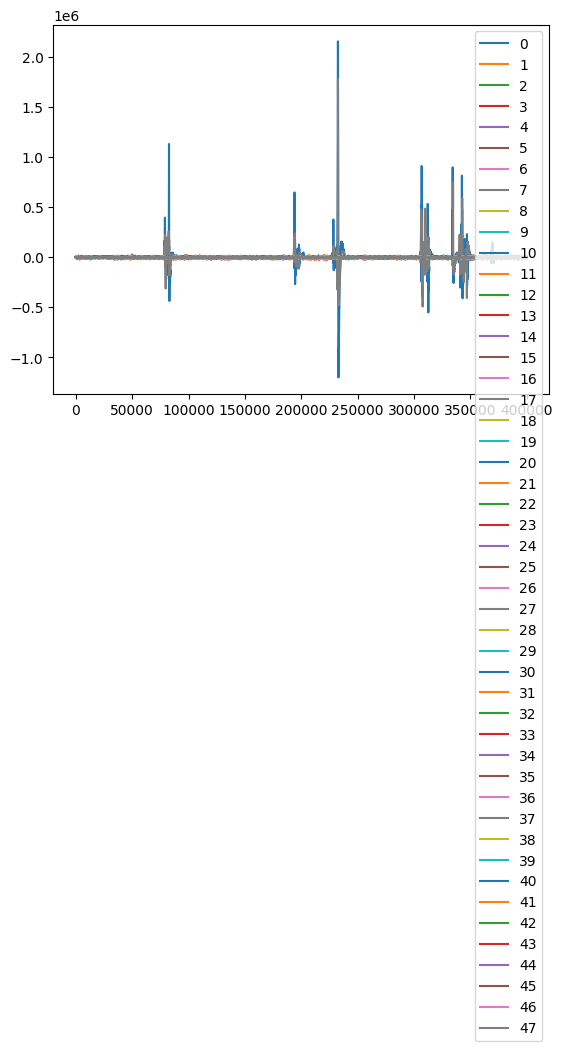

In [5]:
sub2_x_train.plot()

In [7]:
#apply zscore on x_train data and clip the outliers
#import zscore
from scipy import stats
from scipy.stats import zscore
sub2_x_train_final = sub2_x_train.apply(zscore)
sub2_x_train_final = sub2_x_train_final.clip(-3,3)

sub2_x_train_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.008847,0.005209,0.000220,-0.002899,0.007161,0.006016,0.001121,0.000316,-0.000488,0.006901,...,0.004302,0.022089,-0.000735,0.002983,0.007763,-0.000253,0.013637,0.010354,0.019440,0.001773
std,0.961863,0.970816,0.997307,0.984997,0.969338,0.978676,0.991360,0.995316,0.991121,0.972432,...,0.984539,0.888110,0.997498,0.982390,0.970364,0.994317,0.937629,0.953611,0.911101,0.984716
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.518672,-0.569695,-0.660320,-0.640649,-0.501086,-0.482165,-0.626198,-0.659427,-0.655198,-0.398082,...,-0.505862,-0.415809,-0.723395,-0.545493,-0.517960,-0.650136,-0.471079,-0.481137,-0.392292,-0.642264
50%,0.040511,0.020876,0.016766,-0.089465,0.089213,0.103526,0.004785,0.002378,-0.006253,0.082731,...,0.082226,0.031528,-0.098921,0.064972,0.075465,-0.008034,0.029431,0.056109,0.058015,0.010181
75%,0.603496,0.611786,0.682171,0.547520,0.617690,0.622250,0.622655,0.677739,0.650417,0.561509,...,0.634255,0.495202,0.674530,0.633595,0.621669,0.645284,0.550547,0.576204,0.522402,0.651767
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


<Axes: >

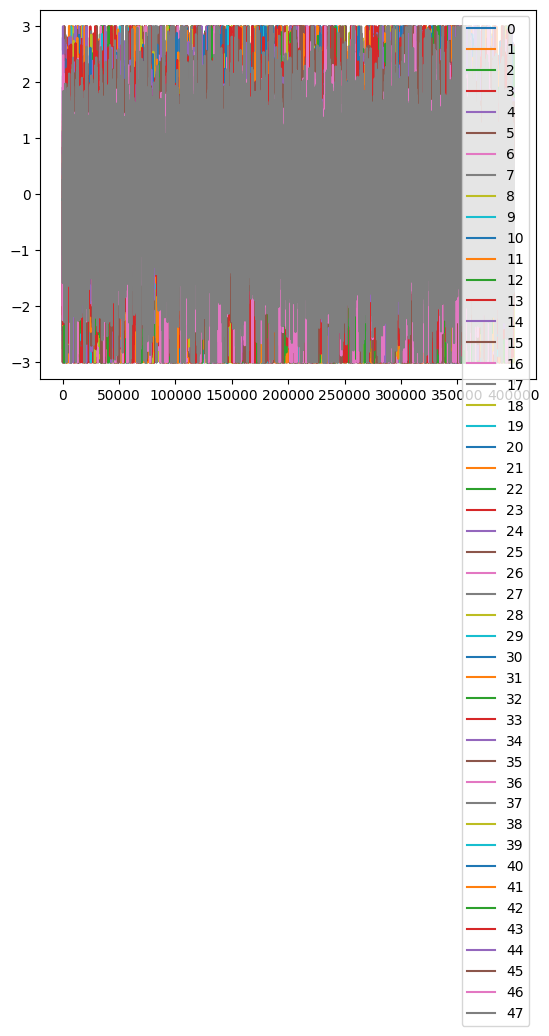

In [8]:
sub2_x_train_final.plot()

<Axes: >

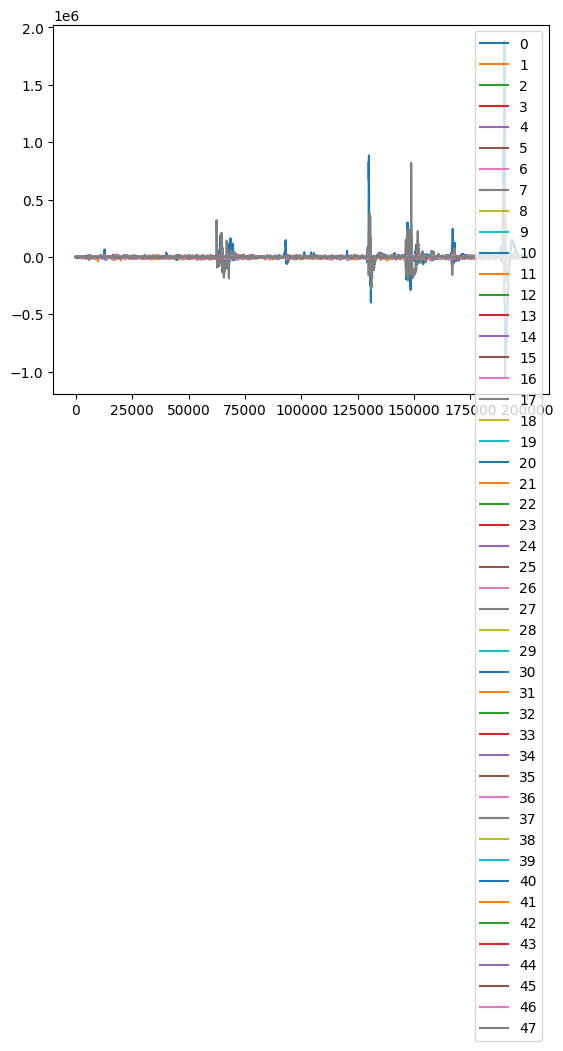

In [9]:
sub2_x_test.plot()

In [10]:
#apply zscore and clip it too on test data
sub2_x_test_final = sub2_x_test.apply(zscore)
sub2_x_test_final = sub2_x_test_final.clip(-3,3)

sub2_x_test_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.007274,0.003917,0.000398,-0.001755,0.006946,0.007945,-0.002611,0.001322,5.686885e-08,0.008234,...,0.004344,0.015815,-0.000305,0.003571,0.009443,-0.000960,0.012140,0.010329,0.015482,0.003310
std,0.952916,0.981306,0.997575,0.985118,0.969231,0.970979,0.979394,0.994544,9.910147e-01,0.970300,...,0.985206,0.901743,0.999029,0.979969,0.957917,0.985150,0.949998,0.952753,0.936555,0.984770
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000e+00,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.508458,-0.583742,-0.659570,-0.612013,-0.466406,-0.485849,-0.614001,-0.648119,-6.423624e-01,-0.380363,...,-0.523679,-0.406275,-0.731722,-0.543010,-0.522942,-0.654130,-0.476527,-0.461512,-0.397869,-0.628324
50%,0.022300,0.028373,0.014222,-0.055017,0.082067,0.097348,-0.008747,0.019515,8.273867e-03,0.087257,...,0.088967,0.046231,-0.082370,0.049421,0.059743,0.011141,0.023722,0.056337,0.059279,0.015231
75%,0.574710,0.630892,0.679896,0.553450,0.605021,0.623950,0.589215,0.670433,6.582045e-01,0.561763,...,0.639780,0.487910,0.684457,0.615179,0.615535,0.657235,0.565518,0.571999,0.535949,0.644424
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


<Axes: >

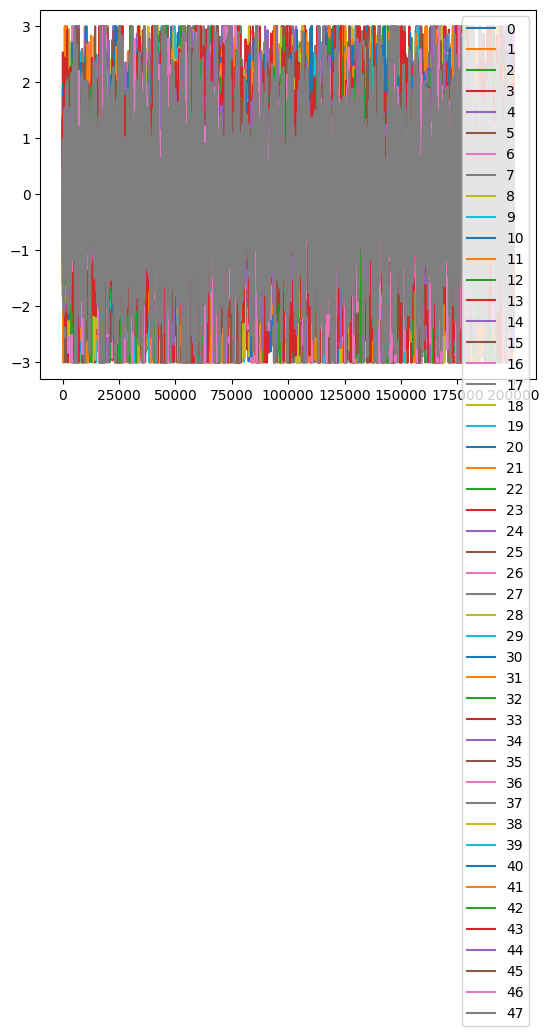

In [11]:
sub2_x_test_final.plot()

In [12]:
sub2_y_test

,0,1,2,3,4
0,0.060250,-0.115182,-0.051467,-0.315159,-0.249496
1,0.060250,-0.115181,-0.051475,-0.315159,-0.249496
2,0.060250,-0.115181,-0.051484,-0.315159,-0.249496
3,0.060250,-0.115180,-0.051494,-0.315159,-0.249496
4,0.060250,-0.115179,-0.051504,-0.315159,-0.249496
...,...,...,...,...,...
199995,-0.015468,-0.160393,-0.058296,0.539060,-0.081450
199996,-0.015206,-0.157843,-0.057182,0.534678,-0.080268
199997,-0.014945,-0.155295,-0.056077,0.530152,-0.079083
199998,-0.014684,-0.152749,-0.054979,0.525487,-0.077896


In [13]:
#train a linear regression model on x_train_final and y_train and then find correlation with final y_test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(sub2_x_train_final, sub2_y_train)
y_pred = regressor.predict(sub2_x_test_final)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df 

,0,1,2,3,4
0,-0.080876,-0.155149,0.136197,-0.248802,-0.192182
1,-0.084225,-0.141528,0.136030,-0.239805,-0.184845
2,-0.079203,-0.127474,0.139664,-0.232543,-0.183063
3,-0.068858,-0.120793,0.142970,-0.232250,-0.187510
4,-0.051349,-0.121360,0.154476,-0.227411,-0.191673
...,...,...,...,...,...
199995,-0.049261,-0.213342,0.281278,-0.302042,-0.285741
199996,-0.032830,-0.201166,0.292947,-0.298528,-0.284130
199997,-0.032889,-0.208005,0.289424,-0.300574,-0.292679
199998,-0.047938,-0.226790,0.267824,-0.307798,-0.306912


In [14]:
#find correlation between y_pred and y_test
from scipy.stats import pearsonr
array1 = np.array(sub2_y_test)
array2 = np.array(y_pred_df)
corr, _ = pearsonr(array1.flatten(), array2.flatten())
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.001
